### Naive Bayes Exercise Using Wine Scikit-learn dataset

Loading the dataset

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()

In [2]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Create a pandas DataFrame for the inputs to the model

In [5]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Checking for null values

In [8]:
df.columns[df.isna().any()]

Index([], dtype='object')

Splitting datasets to the test and train data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,wine.target,test_size=0.2,random_state=100)

In [10]:
print("Train dataset size : ",len(X_train))
print("Test dataset size : ",len(X_test))

Train dataset size :  142
Test dataset size :  36


<h5>Using Gaussian Naive bayes </h5>

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [12]:
model.fit(X_train,y_train)

GaussianNB()

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
model.predict(X_test[:10])

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 1])

In [15]:
y_test[:10]

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 1])

Here We can see that our model predicts the extract same values as `y_test` for the first 10 `X_test` values

In [16]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]], dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

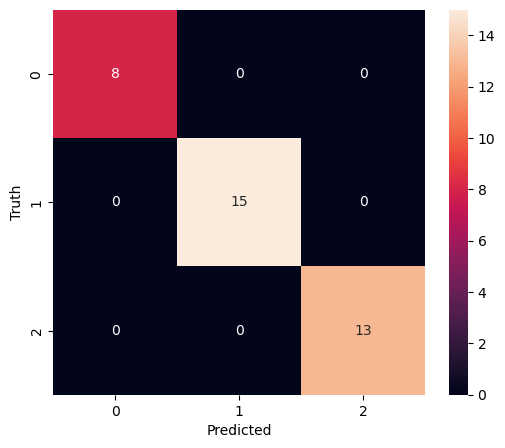

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h5>Using Multinomial Naive Bayes</h5>

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [20]:
model.score(X_test,y_test)

0.8333333333333334

In [21]:
model.predict(X_test[:10])

array([2, 2, 0, 0, 2, 2, 1, 1, 1, 1])

In [22]:
y_test[:10]

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 1])

In [23]:
y_predicted = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 7,  0,  1],
       [ 1, 12,  2],
       [ 0,  2, 11]], dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

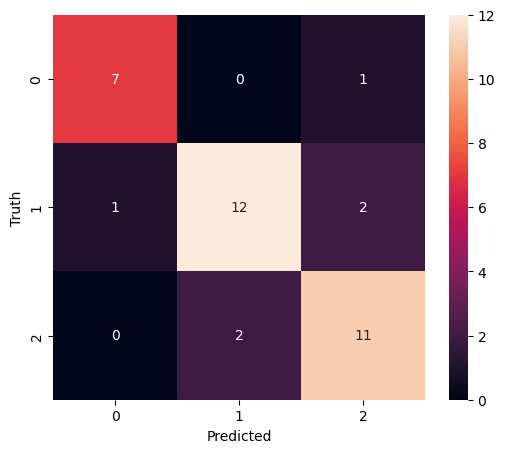

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

 ##### We can say that the `Gaussian Naive bayes` model works better for this prediction with the highest score of 1.